In [33]:
import findiff
from findiff import FinDiff
import numpy as np
import torch
import gpytorch
import matplotlib.pyplot as plt
from findiff import FinDiff, PDE, BoundaryConditions, Coef
from findiff.diff import Id

In [37]:
x, y = [np.linspace(0, 1, 10)] *2
X, Y = np.meshgrid(x, y, indexing='ij')
u = np.identity((len(x)))
laplace_2d = FinDiff(0, x[1]-x[0], 2) + FinDiff(1, y[1]-y[0], 2)

# print('this below is what i need')
# print(laplace_2d.matrix(u.shape).toarray())

test = laplace_2d.matrix(u.shape).toarray()

lam_full, u_full = torch.linalg.eigh(torch.tensor(test))

test_rest = test[1:,1:]

lam_res, u_res = torch.linalg.eigh(torch.tensor(test_rest))

print(u_res.shape)

count = 0
for row_res, row_full in zip(u_res, u_full):
    if np.abs(row_full[2].item() - row_full[0].item()) < 0.0000000001:
        count+=1
    
print(count)


# stencil = laplace_2d.stencil(u.shape)
# This here seems useless atm idk
# print(len(stencil.data))

# print(stencil.apply_all(u)/324)

torch.Size([99, 99])
1


In [41]:
def make_laplace_one_d(shape : int):
    if isinstance(shape, tuple):
        shape = shape[0]
    assert shape >=4, "Cannot do less than 4x4 apparently"
    return L.stencil((shape,shape)).apply_all(np.eye(shape))

shape = (300, )
t = np.linspace(0, 10, shape[0])
dt = t[1]-t[0]

ALPHA = 3
OMEGA = 2
LAMBDA = 0

laplace_1d = FinDiff(0,dt,2) - Coef(LAMBDA)*Id()

L = FinDiff(0, dt, 2) - Coef(ALPHA)*FinDiff(0, dt, 1) + Coef(OMEGA**2)*Id()

f = np.sin(t)

bc = BoundaryConditions(shape)
# bc[0] = 0
# bc[-1] = 0
bc[0] = FinDiff(0, dt, 1), 0
bc[-1] = FinDiff(0, dt, 1), 0
pde = PDE(laplace_1d, f, bc)
u_true = pde.solve()
# lam_res, u_res = torch.linalg.eigh(torch.tensor(test_rest))

# u_full = np.zeros(u_res.shape)

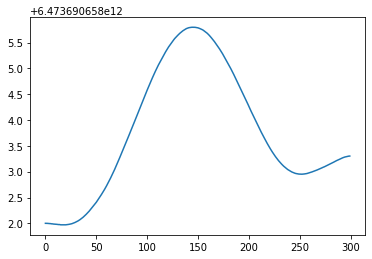

In [42]:
plt.plot(u_true)
